In [31]:
import sys
sys.path.append('../crnn')
from model._next_frame_predictor import NextFramePredictor
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import config

In [32]:
def _predict_one_datapoint(model, npy_path):
    # prepare data
    data = torch.FloatTensor(np.load(npy_path))
    # we need to add two dimensions to the data where usually the batch dimension is
    data = data.unsqueeze(0).unsqueeze(0)

    data = data.to('cpu')
    input, target = data[:, :, :10], data[:, :, 10]

    model.eval()
    with torch.no_grad():
        output = model(input)

    return output.squeeze(), target.squeeze()

In [33]:
def _create_model(seq2latent_model_path: str, latent2nextframe_model_path: str, cell_type: str):
    """ Create a NextFramePredictor model and load the weights from the given paths.
    
    Args:
        seq2latent_model_path (str): The path to the seq2latent model weights.
        latent2nextframe_model_path (str): The path to the latent2nextframe model weights.
        cell_type (str): The type of RNN cell to use.
            
    Returns:
        NextFramePredictor: The model with the loaded weights.
    """
    model = NextFramePredictor(num_channels=1, num_kernels=64,
                               kernel_size=(3, 3), padding=(1, 1), activation="relu",
                               frame_size=(64, 64), cell_type=cell_type).to('cpu')
    model.load_models(seq2latent_model_path, latent2nextframe_model_path, device='cpu')

    return model

In [34]:
def _plot_output_and_target(output, target, save_path, save_name):
    """Plot the predicted and the ground truth image side by side.
    
    Args:
        output (torch.Tensor): The predicted image.
        target (torch.Tensor): The ground truth image.
        save_name (str): The name of the file to save the plot.
    """
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(output, vmin=0.0, vmax=1.0, cmap='binary', square=True)
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    plt.title('Output')

    plt.subplot(1, 2, 2)
    sns.heatmap(target, vmin=0.0, vmax=1.0, cmap='binary', square=True)
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    plt.title('Ground Truth')

    if save_name is not None:
        plt.savefig(f'{save_path}/{save_name}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

In [35]:
def plot_prediction(seq2latent_model_path: str, latent2nextframe_model_path: str, cell_type: str, npy_path: str, save_path: str, save_name: str=None):
    """Load the model weights, predict the next frame of the given data point and plot the result.
    
    Args:
        seq2latent_model_path (str): The path to the seq2latent model weights.
        latent2nextframe_model_path (str): The path to the latent2nextframe model weights.
        cell_type (str): The type of RNN cell to use.
        npy_path (str): The path to the data point to predict the next frame for.
        save_path (str): The path to save the plot.
        save_name (str): The name of the file to save the plot.
    """
    model = _create_model(seq2latent_model_path, latent2nextframe_model_path, cell_type)
    output, target = _predict_one_datapoint(model, npy_path)
    _plot_output_and_target(output, target, save_path, save_name)

# Maze simulation Dataset

(11, 64, 64)


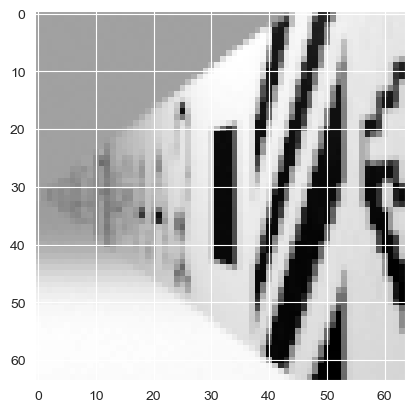

In [36]:
maze_datapoint = f"{config.cloud_project_dir}/03_Datasets/Training_Sets/NI_Dataset_Maze/validation/21_frame_seq.npy"
print(np.load(maze_datapoint).shape)
plt.imshow(np.load(maze_datapoint)[10].squeeze(), cmap='binary')

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


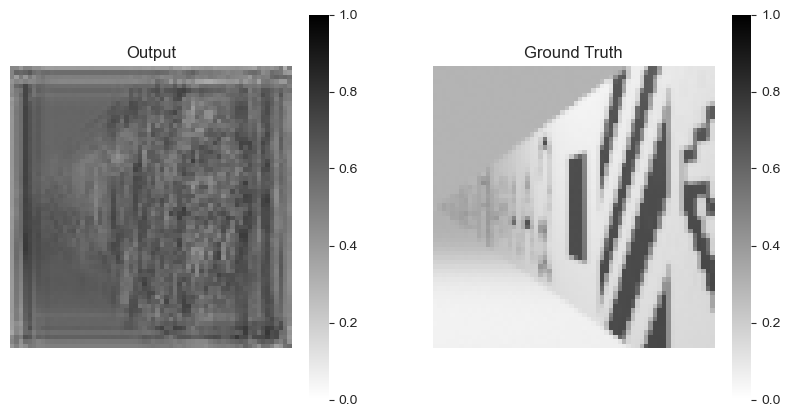

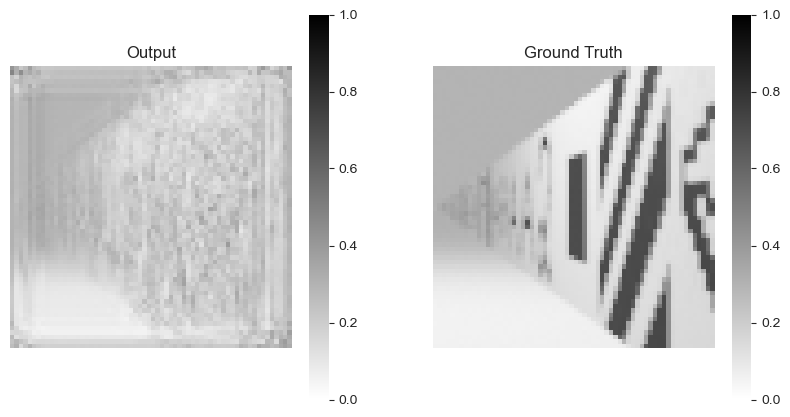

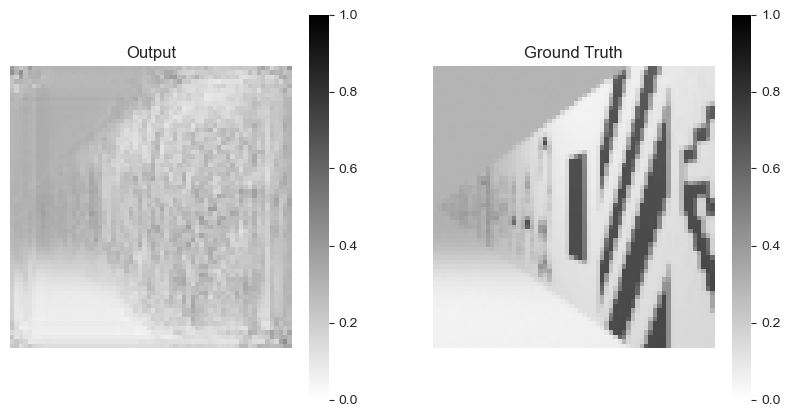

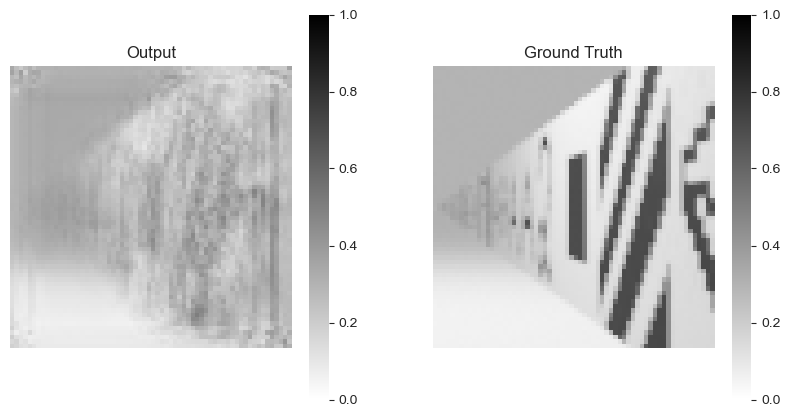

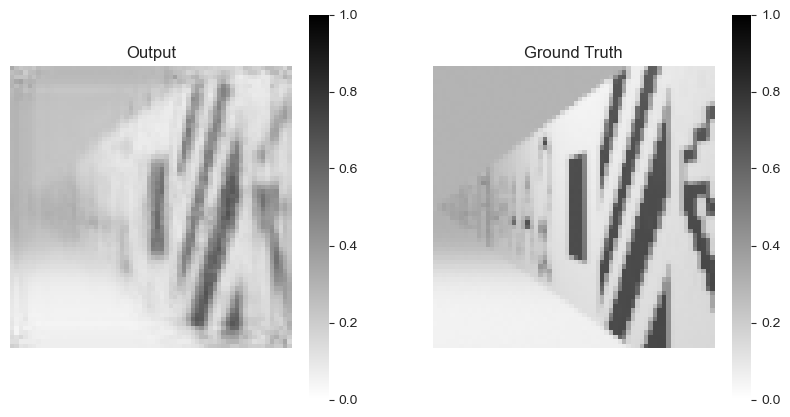

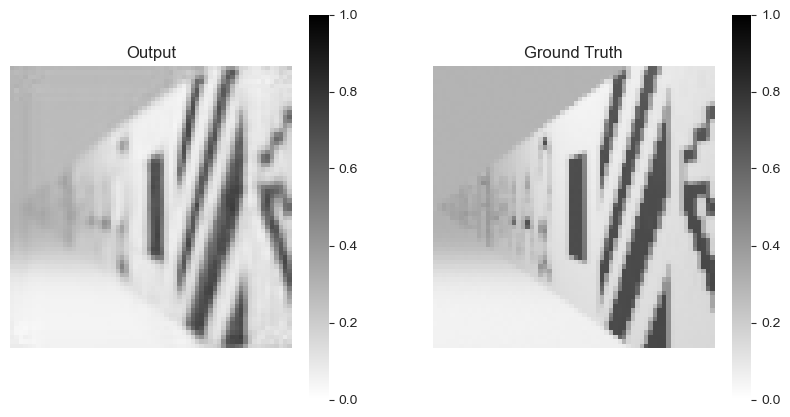

In [38]:
model_dir = f"{config.cloud_project_dir}/01_Output/Training_Output/NI_Maze_Dataset/RNN/No_Pretraining/LM20230707_Train_RNN_NIMaze_None_1/"
investigated_epochs = [0, 1, 2, 5, 10, 60] # Epoch 60 is the fully trained model

for i, epoch in enumerate(investigated_epochs):
    model = 'best_model' if i == len(investigated_epochs) - 1 else 'model'
    seq2latent_path = f'{model_dir}{model}_epoch_{epoch}_seq2latent.pth'
    latent2nextframe_path = f'{model_dir}{model}_epoch_{epoch}_latent2nextframe.pth'
    plot_prediction(seq2latent_path, latent2nextframe_path, 'RNN', maze_datapoint, save_path="figures/Figure_2/Example_Predictions", save_name=f'NotPretrained_epoch_{epoch}')

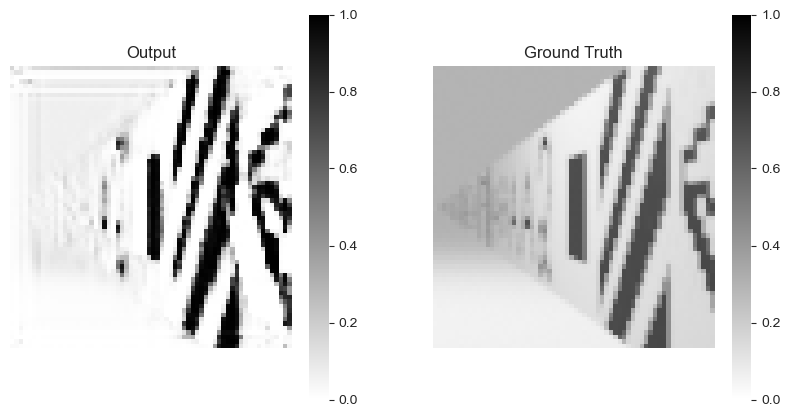

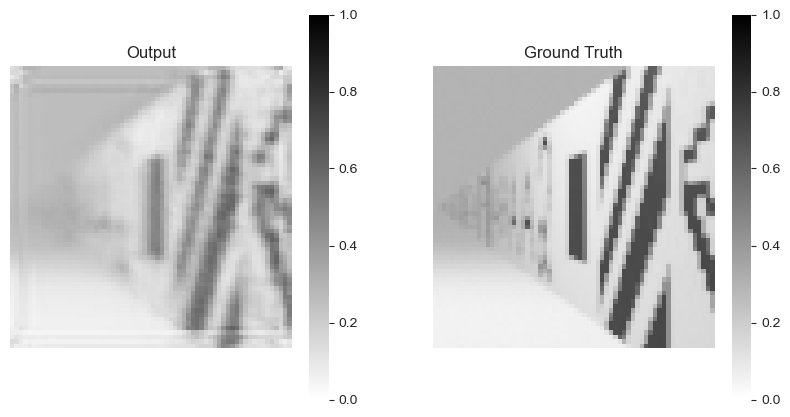

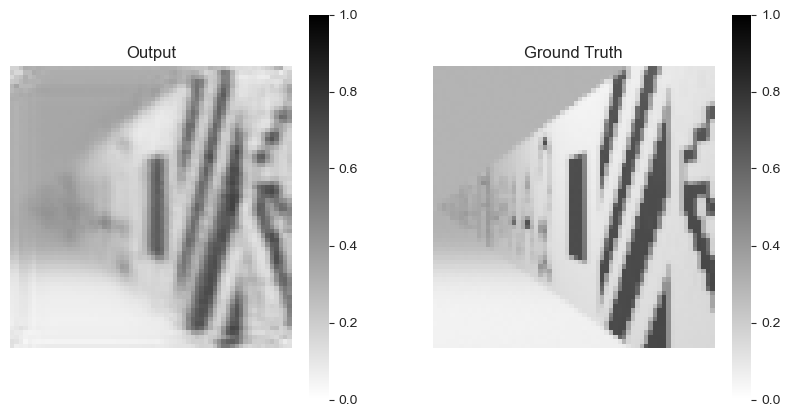

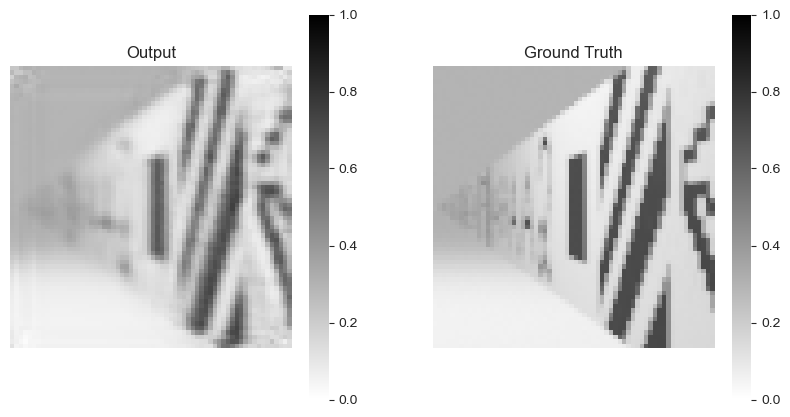

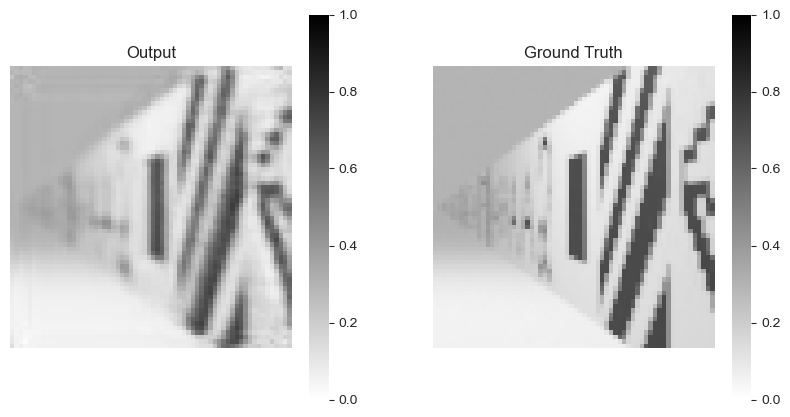

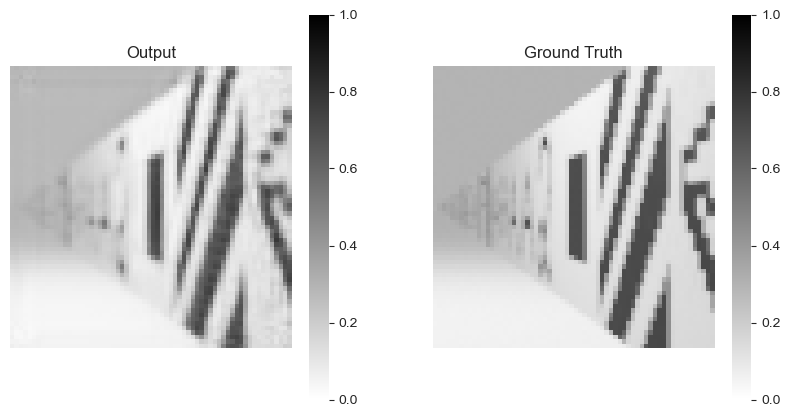

In [39]:
model_dir = f"{config.cloud_project_dir}/01_Output/Training_Output/NI_Maze_Dataset/RNN/Pretrained_Directional/LM20230709_Train_RNN_NIMaze_Directional_Pretrained_1/"
investigated_epochs = [0, 1, 2, 5, 10, 83] # Epoch 83 is the fully trained model

for i, epoch in enumerate(investigated_epochs):
    model = 'best_model' if i == len(investigated_epochs) - 1 else 'model'
    seq2latent_path = f'{model_dir}{model}_epoch_{epoch}_seq2latent.pth'
    latent2nextframe_path = f'{model_dir}{model}_epoch_{epoch}_latent2nextframe.pth'
    plot_prediction(seq2latent_path, latent2nextframe_path, 'RNN', maze_datapoint, save_path="figures/Figure_2/Example_Predictions", save_name=f'DirectedProp_epoch_{epoch}')

# CatCam Dataset

In [ ]:
catcam_datapoint = f"{config.cloud_project_dir}/CatCam_Dataset/validation/catcam0053.npy"

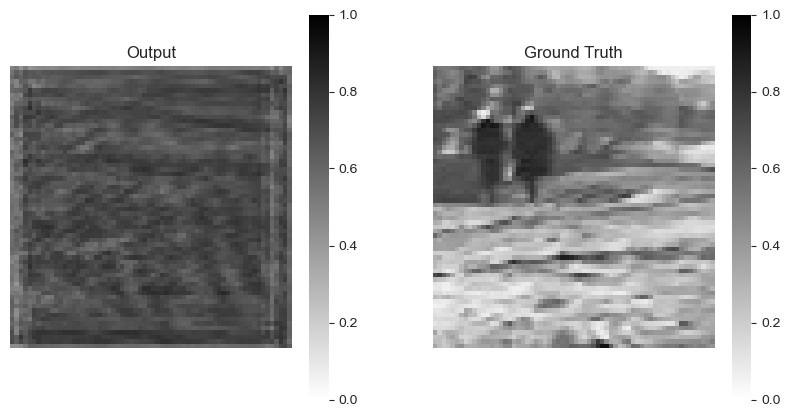

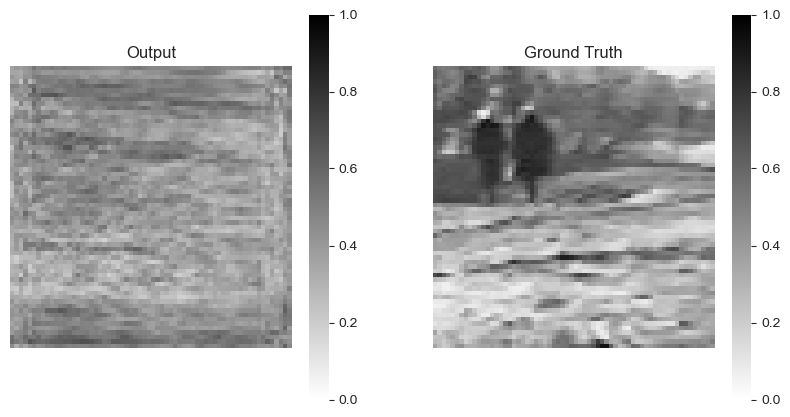

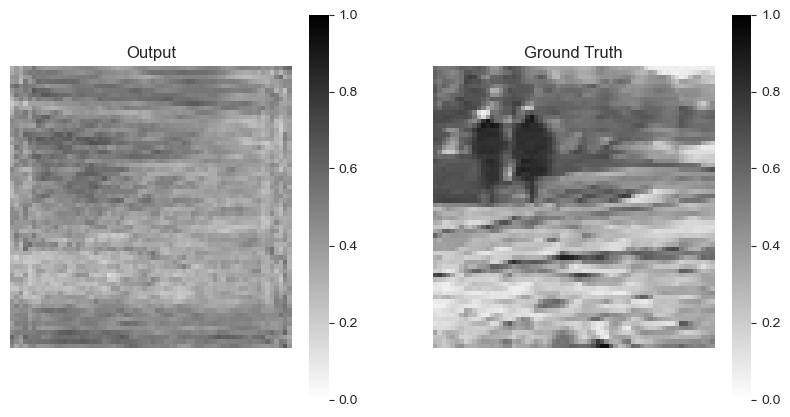

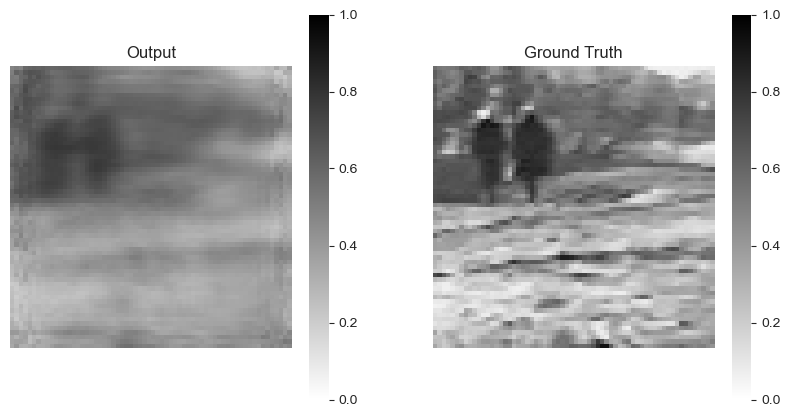

In [14]:
model_dir = f"{config.cloud_project_dir}/01_Output/Training_Output/CatCam_Dataset/RNN/No_Pretraining/LM20231213_Train_RNN_CatCam_None_1/"
investigated_epochs = [0, 1, 2, 29] # Epoch 29 is the fully trained model

for i, epoch in enumerate(investigated_epochs):
    model = 'best_model' if i == len(investigated_epochs) - 1 else 'model'
    seq2latent_path = f'{model_dir}{model}_epoch_{epoch}_seq2latent.pth'
    latent2nextframe_path = f'{model_dir}{model}_epoch_{epoch}_latent2nextframe.pth'
    plot_prediction(seq2latent_path, latent2nextframe_path, 'RNN', catcam_datapoint, save_path="figures/Supplementary_Figures/CatCam/Example_Predictions", save_name=f'NotPretrained_epoch_{epoch}')

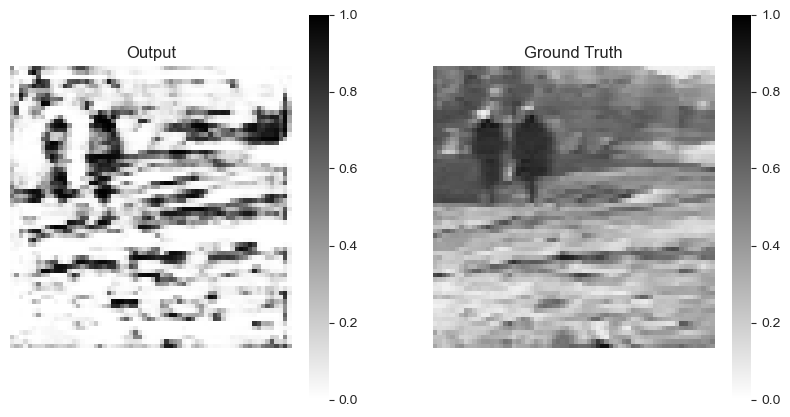

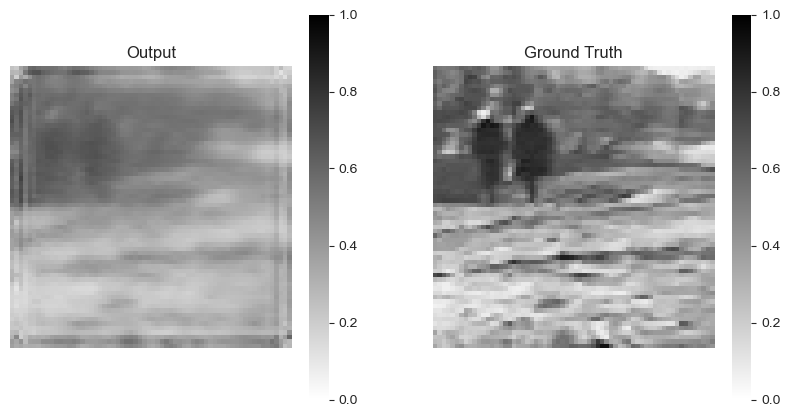

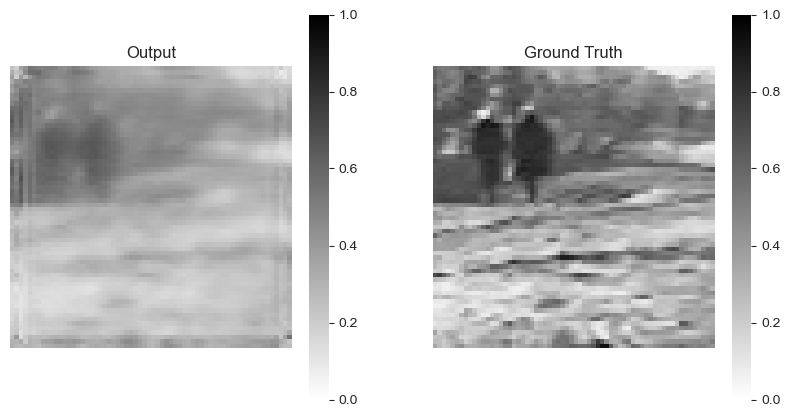

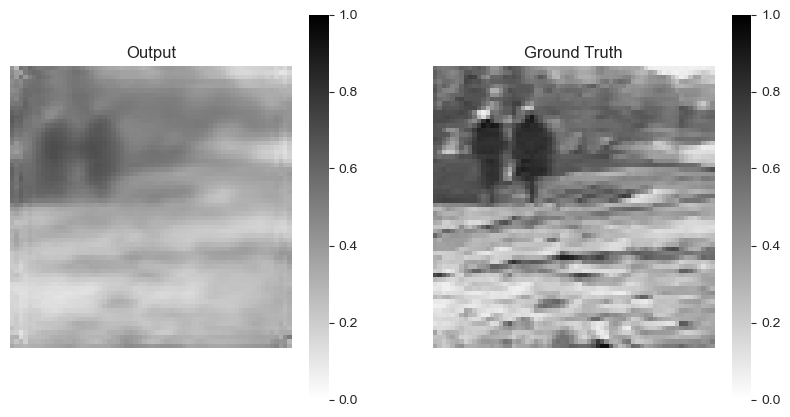

In [15]:
model_dir = f"{config.cloud_project_dir}/01_Output/Training_Output/CatCam_Dataset/RNN/Pretrained_Directional/LM20231213_Train_RNN_CatCam_Directional_Pretrained_1/"
investigated_epochs = [0, 1, 2, 6] # Epoch 6 is the fully trained model

for i, epoch in enumerate(investigated_epochs):
    model = 'best_model' if i == len(investigated_epochs) - 1 else 'model'
    seq2latent_path = f'{model_dir}{model}_epoch_{epoch}_seq2latent.pth'
    latent2nextframe_path = f'{model_dir}{model}_epoch_{epoch}_latent2nextframe.pth'
    plot_prediction(seq2latent_path, latent2nextframe_path, 'RNN', catcam_datapoint,save_path="figures/Supplementary_Figures/CatCam/Example_Predictions", save_name=f'DirectedProp_epoch_{epoch}')